# Question 1

In [22]:
import numpy as np
import math
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
random_data = np.random.normal(size=(1500, 2))
X = random_data[:,0]
y = 2*X + 5 + 0.4 * np.random.randn(1500)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333333333, random_state=42)
len(X_train)

1000

In [4]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
# X_train
# X_test

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
c = lr.intercept_
c

4.988778220127472

In [7]:
m = lr.coef_
m

array([2.00686454])

In [8]:
Y_pred_train = m*X_train + c
Y_pred_train.flatten()[:20]

array([5.16069986, 4.95694128, 4.88206706, 6.35041266, 7.79202837,
       8.25581198, 5.00115836, 7.22118735, 4.80301802, 4.11237816,
       6.17087882, 6.14689886, 6.77938959, 2.72717213, 4.56922458,
       3.88533533, 6.35984264, 7.75746419, 2.40793674, 6.37423308])

In [9]:
y_pred_train1 = lr.predict(X_train)
y_pred_train1[:20]

array([5.16069986, 4.95694128, 4.88206706, 6.35041266, 7.79202837,
       8.25581198, 5.00115836, 7.22118735, 4.80301802, 4.11237816,
       6.17087882, 6.14689886, 6.77938959, 2.72717213, 4.56922458,
       3.88533533, 6.35984264, 7.75746419, 2.40793674, 6.37423308])

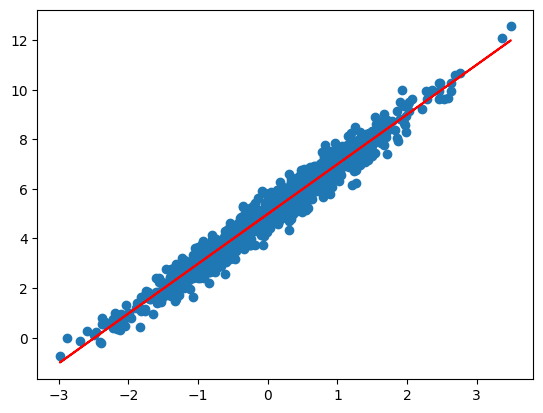

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train1, color ='red')

In [11]:
y_pred_test1 = lr.predict(X_test)
y_pred_test1

array([ 5.25861149,  5.95171037,  5.18821535,  5.44258379,  4.97874173,
        4.67737582,  6.65814326,  6.29865437,  1.97271291,  5.24659676,
        3.22809376,  6.98123886,  2.28704464,  7.16320008,  7.34778625,
        3.8124514 ,  7.50014869,  6.1451166 ,  7.75951578,  7.4215026 ,
        1.98898032,  7.65746645,  5.25876038,  5.69268033,  6.17390007,
        5.24991422,  5.87482259,  2.81573967,  2.70372893,  4.72975034,
        4.08418067,  4.56314484,  4.92041674,  7.07839914,  5.73721806,
        4.00082308,  5.33277256,  6.58845168,  6.27039087,  7.78664587,
        4.02793558,  5.90690039,  5.64880422,  6.72064863,  4.42782933,
        6.16495611,  5.46320726,  5.97623105,  7.15566995,  5.14160483,
        7.92069466,  4.96220137,  3.42263655,  5.73885615,  4.58654642,
        4.24159749,  6.46705821,  7.25941721,  5.77396184,  5.97359003,
        7.90065636,  5.68301565,  2.48868045,  4.48553476,  3.73954211,
        7.1230577 ,  3.05019198,  4.19796442,  3.56005814,  8.16

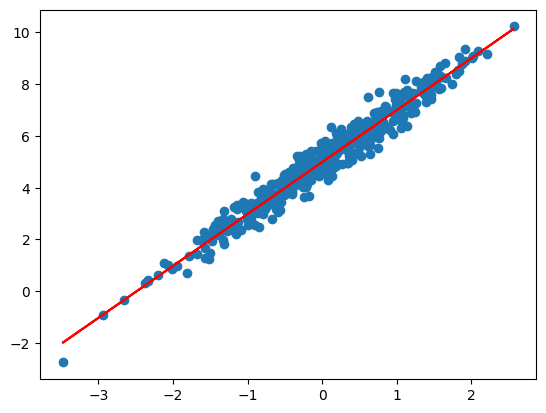

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test1, color ='red')

# Question 2

In [13]:
import pandas as pd

In [15]:
data = pd.read_csv("data1.csv")
data.info

<bound method DataFrame.info of       x   y
0    17  94
1    13  73
2    12  59
3    15  80
4    16  93
..   ..  ..
115  14  85
116  16  66
117  16  79
118  18  77
119  19  91

[120 rows x 2 columns]>

In [16]:
X = data.iloc[:,0].values
y = data.iloc[:,-1].values

In [17]:
X_train, X_test, y_train, y_test  = X[:84], X[84:], y[:84], y[84:] #(70:30 train test split, 70% of 120 = 84)

In [18]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [19]:
val_count = len(X)

In [20]:
numer = 0
denom = 0
for i in range(val_count):
  numer += (X[i] - mean_x) * (y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print("m = ", m)
print("c = ", c)

m =  3.1792452830188656
c =  30.103773584905703


In [23]:
y_pred = m * X + c

rmse = math.sqrt(np.mean((y - y_pred) ** 2))
mae = np.mean(np.abs(y - y_pred))

print("RMSE =", rmse)
print("MAE =", mae)

RMSE = 8.817810022046613
MAE = 7.305660377358489


##### Verifing using Sklearn LR implementation


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

X = X.reshape(val_count, 1)
lr = LinearRegression()
lr = lr.fit(X,y)
Y_pred = lr.predict(X)

rmse1 = sqrt(mean_squared_error(y,Y_pred))
mae1 = mean_absolute_error(y,Y_pred)

print("m = ", lr.coef_[0])
print("c = ", lr.intercept_)
print("RMSE =", rmse1)
print("MAE =", mae1)

m =  3.1792452830188678
c =  30.103773584905667
RMSE = 8.817810022046611
MAE = 7.305660377358489
